# Smart representations
                                abechens@unice.fr
                                26/09-2019
Name:

Name:

A report must be handed in by mail by 02/10.


## Introduction
The purpose of this practical session is to introduce you to linear discrete
transformations of an input signal (e.g image, video) that allow its decomposition
and reconstruction in an analysis-synthesis fashion, by multiplication with a
set of transform functions.
During this lab session, we will consider the discrete wavelet transformations
that allow the signal decomposition at multiple scales, orientations, etc.
Generally, wavelet decomposition will help separate the high frequencies
(features such as details, edges, noise, etc.) from the low frequencies of
an image; it will also allow for a sparse representation of the signal
(i.e the energy of the signal is found in relatively few non-null coefficients,
leading to a more compact representation of the signal and paving the way
for compression).
More specifically, we will introduce the Haar Wavelet transform (the
simplest orthogonal wavelet transform).\\

Optionally: you can implement the Laplacian Pyramid for the same purpose, decomposition-reconstruction of
an image. You are not required for the strict purpose of this lab, but if you
choose to do so, that will be considered as a bonus (see section Laplacian).


In [1]:
# Fonctions et imports utiles
import matplotlib.pyplot as plt
import numpy as np

## The Haar Transform
It is the simplest orthogonal wavelet transform. In order to decompose
the input signal (image) into a series of Haar wavelet coefficients, we can
apply a series of steps that are described below, through an example, both for
analysis (decomposition into coefficients) and for synthesis (reconstruction
of the signal from wavelet coefficients).
The decomposition is perfomed through a series of averaging and differencing
of the values of the signal leading to a sparse representation that could be stored in an efficient manner.

Below you will find an example of the general pipeline for 1D signal
analysis and synthesis.


### Example of 1D signal analysis
1. Generation of an input signal:
$$
A = [88, 88, 89, 90, 92, 94, 96, 97]
$$
2.  Considering its elements in groups of 2:
$$
A_g = [88, 88] [89, 90] [92, 94] [96, 97]
$$
3. Computing the average of each group and placing them in the first half
of the signal ( obtain the approximation coefficients). Averaging
corresponds to low-pass filtering (i.e smoothing the data,
removing high-frequency components):
$$
A_g  = [{\color{red}{ 88, 89.5, 93, 96.5}}, 92, 94, 96, 97]
$$
4. Computing half of the difference of each group and placing them in the second half of the signal ({\bf obtain the detail coefficients}). The differencing corresponds to high-pass filtering}.
5. Result of the analysis step after one level of decomposition :
$$
A_1  = [{\color{red}{ 88, 89.5, 93, 96.5}}, {\color{green}{ 0, -0.5, -1, -0.5}}]
$$




Perform these steps on the signal A defined above.

In [2]:
import numpy as np

In [3]:
def chunk_split(lst, chunk_size):
    chunks = [lst[i:i+chunk_size] for i in range(0, len(lst), chunk_size)]
    return chunks

In [4]:
A=[88,88,89,90,92,94,96,97]
A_split=np.array(chunk_split(A, 2))
A_split_mean=np.array([i.mean() for i in A_split])
print(A_split_mean)

[88.  89.5 93.  96.5]


In [5]:
def diff(fullList, meanList):
    result=np.zeros(int(len(fullList)/2))
    for i in range(len(meanList)):
        result[i] = meanList[i]-(fullList[i*2+1])
    return result

In [6]:
diff(A, A_split_mean)

array([ 0. , -0.5, -1. , -0.5])

In [7]:
def haar1d(A):
    A_split=list(chunk_split(A, 2))
    A_split_mean = np.array([sum(i)/len(i) for i in A_split])
    A_diff = diff(A, A_split_mean)      
    return  np.concatenate((A_split_mean, A_diff))

In [8]:
haar1d(A)

array([88. , 89.5, 93. , 96.5,  0. , -0.5, -1. , -0.5])

## Example of 1D signal synthesis

The reverse procedure that will take as an input the wavelet coefficients and
output the reconstructed original signal is called signal synthesis.

1. Input signal:
$$
A_1  = [88, 89.5, 93, 96.5, 0, -0.5, -1, -0.5]
$$
2. Upsample the average values and use the differences to reconstruct:
$$
A_u  = [\underbrace{88,\ 88,}_{\pm 0}\ \underbrace{89.5,\ 89.5,}_{\pm 0.5}\ \underbrace{93,\ 93,}_{\pm 1}\ \underbrace{96.5,\ 96.5}_{\pm 0.5}]\\
$$
3. Output signal identical to the original one:
$$
\hat{A}= A = [88, 88, 89, 90, 92, 94, 96, 97]
$$




Perform these steps

In [9]:
A1 =[88. , 89.5, 93. , 96.5,  0. , -0.5, -1. , -0.5]

In [10]:
def synthesis1d(lst):
    result = np.zeros(len(lst))
    for i in range(0,len(lst),2):
        result[i] = lst[int(i/2)]+lst[int(len(lst)/2+i/2)]
    for i in range(1,len(lst),2):
        result[i] = lst[int(i/2)]-lst[int(len(lst)/2+i/2)]
    return result

In [11]:
synthesis1d(A1)

array([88., 88., 89., 90., 92., 94., 96., 97.])

We can continue this procedure in order to obtain multiple levels of
decomposition, in which case we are referring to multiscale decomposition.
In order to perform a multiscale decomposition we iterate steps (2)-(4)
using as an input the averaged values (the first half of the signal) and leaving
the rest unchanged. For example, after a subsequent level of decomposition,
the values of the signal should be the following:
$$
A2 = [88.75, 94.75, -0.75, -1.75, 0 -0.5, -1, -0.5]
$$


Create  A2

In [12]:
E = haar1d(A)
print(E)
X = E[0:len(E)//2]
print(X)
F = haar1d(X)


[88.  89.5 93.  96.5  0.  -0.5 -1.  -0.5]
[88.  89.5 93.  96.5]


In [13]:
def multidecomposition(a, grade):
    b = a[0:len(a)//2**(grade-1)]
    c = haar1d(b)
    d = np.concatenate((c, a[len(c):]))
    return d

In [14]:
multidecomposition(A, 1)

array([88. , 89.5, 93. , 96.5,  0. , -0.5, -1. , -0.5])

In [15]:
multidecomposition(E, 2)

array([88.75, 94.75, -0.75, -1.75,  0.  , -0.5 , -1.  , -0.5 ])

# Case of a 2D signal
In the case of a 2D signal, we apply the previous steps to each column and
row of the input image:


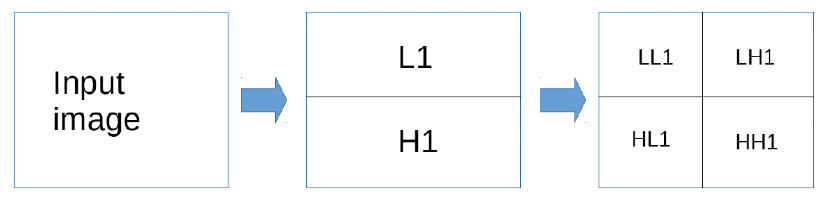
Figure 1: Haar 2D decomposition on the first level: columns and then rows. (We denote L as corresponding to low-frequency, see approximation coefficients and H as high-frequency, see detail coefficients).

Perform the Haar wavelet transform (analysis-synthesis) of the 2D image Lena. The Figure 1 illustrates the first level of a Haar decomposition of an image during the analysis step. You can use the above 1-D example as a guideline, paying attention to apply the suggested pipeline to every row and column alternatively (i.e to all of the columns first and then to all of the rows or analogously start applying to all of the rows and then to all of the
columns). If we consider a square matrix $N\times N$, the total number of decomposition levels for a Haar operator is equal to $\log_2(N)-1$. Knowing that, perform the Haar transformation on multiple scales.

Side note: The above process could be implemented as a convolution between the input signal and a set of lowpass and highpass filters which result in averaging and differencing the values of each group. Similarly, for a 2D signal, we apply the low-pass and high-pass filter to each row and column of the input image.


In [16]:
import math
import matplotlib.pyplot as plt
def haar2D(image, n_levels=1):
    """
        Performs the Haar transform on a full image

        :param image: The image to be transformed
        :param n_levels: the number of levels
        :return: the Haar transform of image
        """
    
    # Calculate the number of levels
    max_levels = math.log2(image.shape[0])-1
    levels = min(max_levels, n_levels)
    
    if(n_levels==0): return image
    else:
        # As the for loop visits everything by rows we transpose to visit it by columns
        result_bycols = np.array([haar1d(i) for i in np.transpose(image)])
        
        # We transpose once again on the result to perform it by rows
        result = np.array([haar1d(i) for i in np.transpose(result_bycols)])
        
        # We select the first quarter of the image
        reduced = result[0:image.shape[0]//2, 0:image.shape[1]//2]
        
        # We replace it with the 
        result[0:image.shape[0]//2,0:image.shape[1]//2] = haar2D(reduced, levels-1)

        return result

Test and observe the Haar decomposition of Lena.

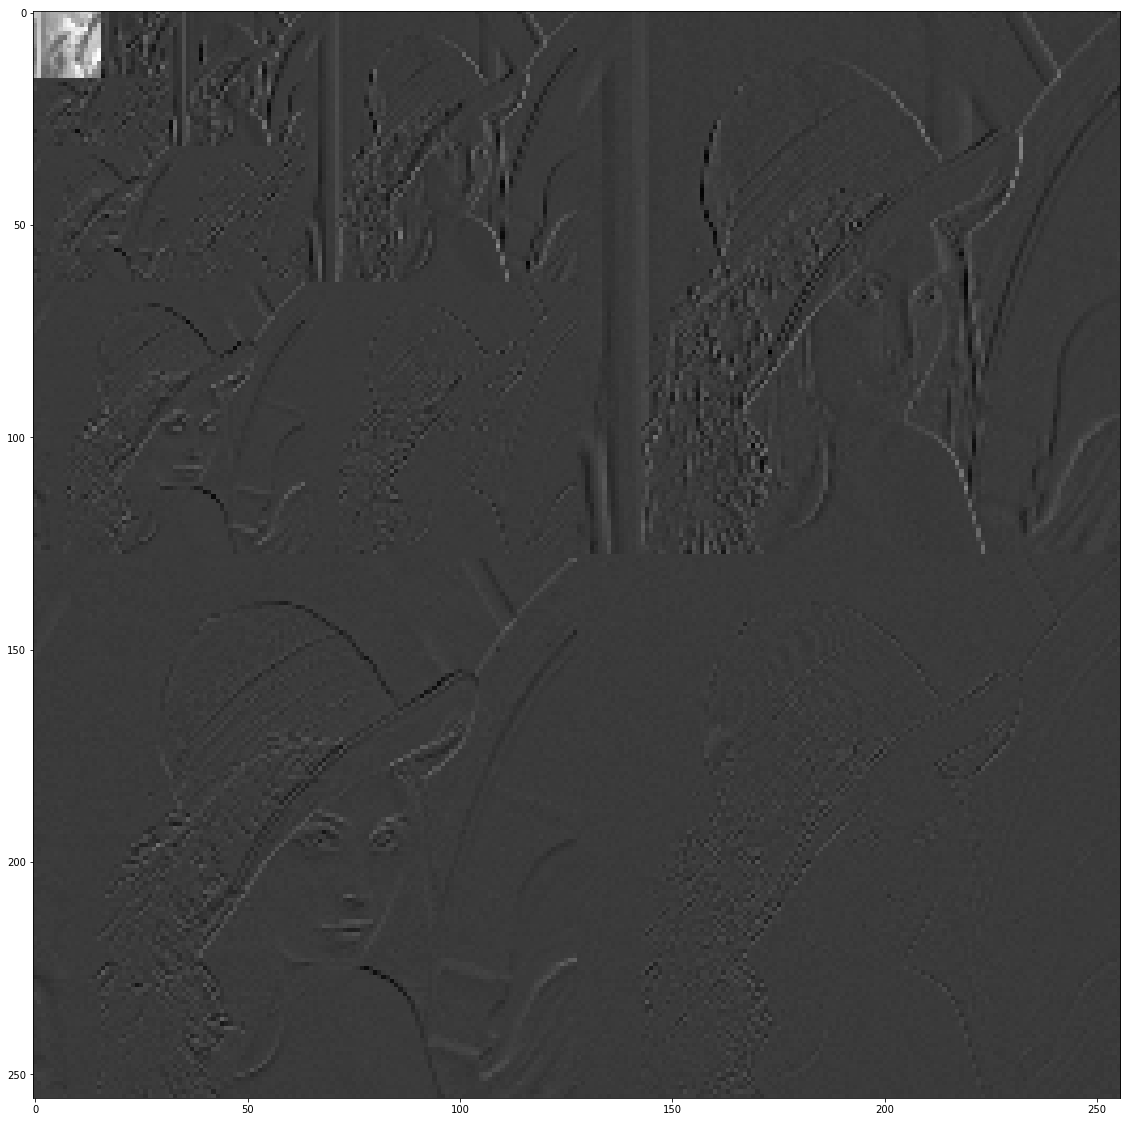

In [17]:
# Edges are hardly visible, set brightness to max
lena = plt.imread("lena.bmp")
lena_4l = haar2D(lena, n_levels=4)
plt.figure(figsize = (20,20))
plt.imshow(lena_4l, cmap='gray')

Write and test a program that, from an image decomposed with the Haar transformation, reconstructs the original image. 

In [18]:
def synthesis2d(image, n_levels=1):
    im = image.copy()
    if(n_levels==1): 
        # As the for loop visits everything by rows we transpose to visit it by columns
        result_bycols = np.array([synthesis1d(i) for i in np.transpose(im)])
        
        # We transpose once again on the result to perform it by rows
        result = np.array([synthesis1d(i) for i in np.transpose(result_bycols)])
        
        return result
    
    else:
        size = im.shape[0]//(2**(n_levels-1))
        im[0:size,0:size] = synthesis2d(im[0:size,0:size], 1) 
        return synthesis2d(im, n_levels-1)
        

Does the Haar transformation seems adapted to use for image compression? 

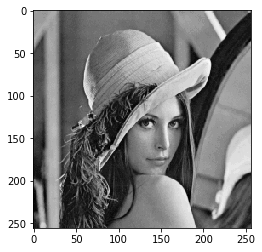

In [19]:
reconstructed_4l = synthesis2d(lena_4l ,4)
plt.imshow(reconstructed_4l, cmap='gray')

In [20]:
np.array_equal(reconstructed_4l, lena)

True

## The Laplacian pyramid  (Optional)
The Laplacian pyramid was introduced by Burt and Adelson in 1983. It is very similar to Gaussian pyramid but more efficient from the compression point of view.

### Example of 2D signal analysis

1. Build a 2D Gaussian Filter $g(x, y)$ (e.g. using $3\times 3$, $5\times 5$ Gaussian convolution kernels)
2. Convolve the image with the Gaussian filter, to obtain a smoothed (low-pass filtered) version, $G$.
3. Downsample ($2\downarrow$) the rows and columns of $G$ (e.g. keep only the odd indexes of both rows and columns), to reduce its size, and obtain $R$, the next level of the Gaussian pyramid. In order to compute the Laplacian pyramid, you  need to subtract every 2 sequential levels and store their difference. To achieve this, you will upsample $R$. 
4. Iterate steps (2)-(3) in order to build $\log_2(N)-1$ Laplacian decomposition layers, paying attention to use $R$ obtained at previous level as the input for Gaussian filtering.


### Example of 2D signal synthesis
1. Upsample the last $R$ from your decomposition
2. Add the corresponding previous Laplacian decomposition and iterate the above process until reconstruction.
